In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

# Read the data
data = pd.read_csv('data/dataset_mood_smartphone.csv')
display(data.head())

# Print the number of rows and columns
print(f"\nNumber of lines: {data.shape[0]}\t number of columns: {data.shape[1]}")

# Print the number of unique IDs
print(f"\nNumber of unique users: {len(data['id'].unique())}")



,Unnamed: 0,id,time,variable,value
0,1,AS14.01,2014-02-26 13:00:00.000,mood,6.0
1,2,AS14.01,2014-02-26 15:00:00.000,mood,6.0
2,3,AS14.01,2014-02-26 18:00:00.000,mood,6.0
3,4,AS14.01,2014-02-26 21:00:00.000,mood,7.0
4,5,AS14.01,2014-02-27 09:00:00.000,mood,6.0



Number of lines: 376912	 number of columns: 5

Number of unique users: 27


## First notable things about the data

- Different ID's have a different selection of variables. For example: AS14.01 only has values for the variable: 'mood'

## Visual analysis

Lets start out with some histograms:
- mood scores
- number of variables

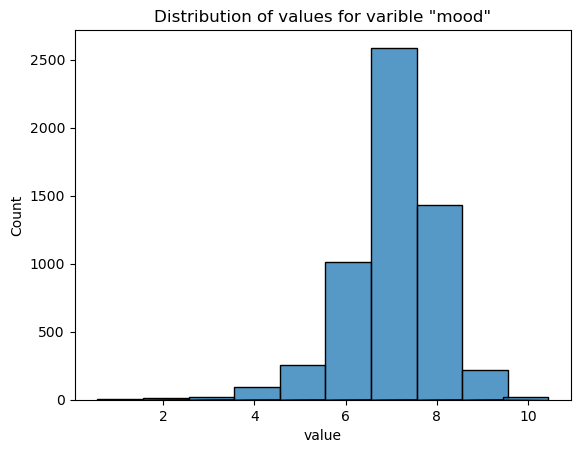

/var/folders/gb/wg4yqhd96qdd3bv_wbfq_5b40000gn/T/ipykernel_31707/3599053877.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arousal_data.dropna(axis=0, inplace=True)


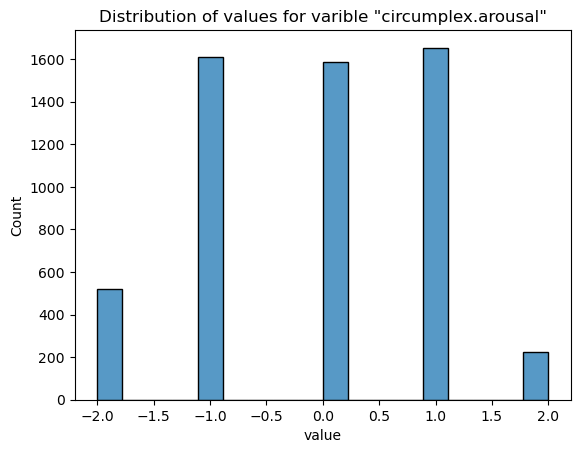

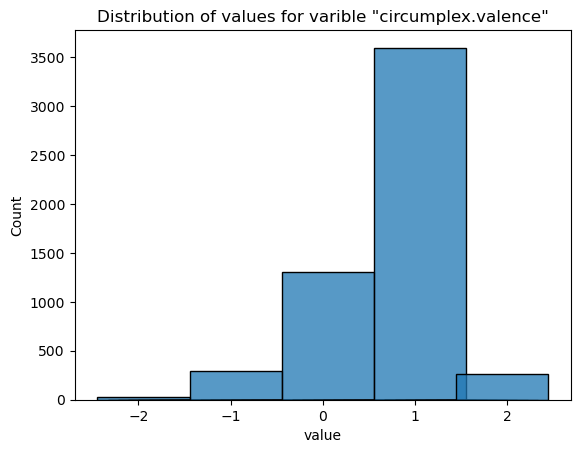

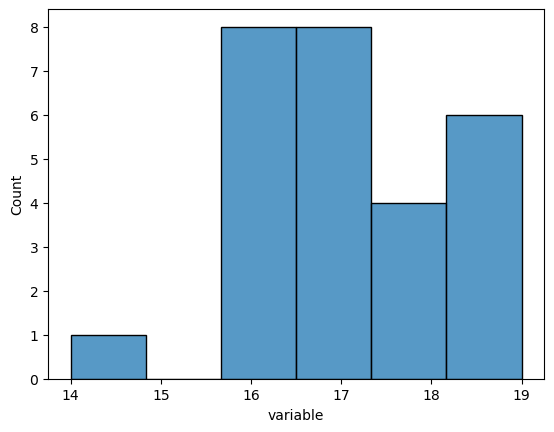

In [13]:
# mood hist
mood_map = data['variable'] == 'mood'
mood_data = data[mood_map]
sns.histplot(data=mood_data, x='value', shrink=9)
plt.title('Distribution of values for varible "mood"')
plt.show()

# arousal hist]
arousal_map = data['variable'] == 'circumplex.arousal'
arousal_data = data[arousal_map]
arousal_data.dropna(axis=0, inplace=True)
arousal_data['value'].map(lambda x: int(x), inplace=True)
sns.histplot(data=arousal_data, x='value')
plt.title('Distribution of values for varible "circumplex.arousal"')
plt.show()

# valence hist
valence_map = data['variable'] == 'circumplex.valence'
valence_data = data[valence_map]
sns.histplot(data=valence_data, x='value', shrink=9)
plt.title('Distribution of values for varible "circumplex.valence"')
plt.show()

# get number of unique variable types for each user
unique_var = data.groupby('id')['variable'].nunique()
sns.histplot(data=unique_var, shrink=1)
plt.show()

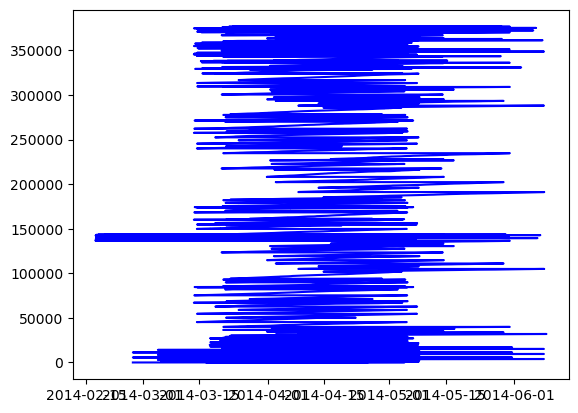

In [11]:
# lineplot of time series data
dates = matplotlib.dates.date2num(data['time'].values)
y_values = list(range(len(dates)))
plt.plot_date(dates, y_values, fmt='b-')
plt.show()

# # lineplot of time series data per ID
# for id in data['id'].unique():
#     id_mask = data['id'] == id
#     id_data = data[id_mask]
#     dates = matplotlib.dates.date2num(id_data['time'].values)
#     dates_sorted = sorted(dates)
#     y_values = list(range(len(dates)))
#     plt.plot_date(dates_sorted, y_values, fmt='b-')
#     plt.title(f"ID: {id}")
#     plt.yticks(minor=True)
#     plt.show()